In [1]:
import numpy as np
import time
import generalized_genSim_shorten_time_HMM as ggsdHMM
import numpy as np
import curve_fitting as cf
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
#import matplotlib.cm as cmx
from scipy import optimize, stats
import bluepyopt as bpop
import bluepyopt.deapext.algorithms as algo
import vclamp_evaluator_HMMtoHH as vcl_ev
import pickle
import time
from deap import tools
#from deap import base, creator
import multiprocessing
#import eval_helper as eh
#import scoring_functions_relative as sf
#import curve_fitting as cf
import generalized_genSim_shorten_time as ggsd
import eval_helper_na12mut8st as ehn
import general_plotter

Reached import hoc
Reached import neuron.hoc


In [2]:
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod.csv', 'Basis', 'na12mut8st', 'na12mut', objective_names=['act', 'inact'])


#evaluator = vcl_ev.Vclamp_evaluator_HMM('./param_stats_narrow.csv', 'A427D', 'na', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope'])

In [3]:
evaluator.wild_data

{'v_half_act': -19.438432175828535,
 'gv_slope': 6.1618554048712015,
 'v_half_ssi': -44.72164146029349,
 'ssi_slope': 7.055442056187008,
 'tau_fast': 0.8927258721940866,
 'tau_slow': 1.1909104890546904,
 'percent_fast': 0.002371458641170018,
 'tau0': 0.4231792451831216,
 'peak_amp': -0.29202235337531235,
 'time_to_peak': 5.20000000000004}

In [4]:
gen_counter = 0
best_indvs = []
cp_freq = 1
old_update = algo._update_history_and_hof
def my_update(halloffame, history, population):
    global gen_counter,cp_freq
    if halloffame is not None:
        halloffame.update(population)
    
    if halloffame:
        best_indvs.append(halloffame[0])
    gen_counter = gen_counter+1
    print("Current generation: ", gen_counter)
    if gen_counter%cp_freq == 0:
        fn = '.pkl'
        save_logs(fn,best_indvs,population)

def my_record_stats(stats, logbook, gen, population, invalid_count):
    '''Update the statistics with the new population'''
    record = stats.compile(population) if stats is not None else {}
    logbook.record(gen=gen, nevals=invalid_count, **record)
    print('log: \n', logbook, '\n')
    output = open("log.pkl", 'wb')
    pickle.dump(logbook, output)
    output.close()

def save_logs(fn, best_indvs, hof):
    output = open("indv"+fn, 'wb')
    pickle.dump(best_indvs, output)
    output.close()
    output = open("hof"+fn, 'wb')
    pickle.dump(hof, output)

In [5]:
#hof = tools.HallOfFame(1, similar=np.array_equal)
hof = tools.ParetoFront()
algo._update_history_and_hof = my_update
algo._record_stats = my_record_stats
pool = multiprocessing.Pool(processes=64)
deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=100, hof = hof, map_function=pool.map)  # CHANGE offspring_size

cp_file = './cp.pkl'

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of t

In [6]:
start_time = time.time()
pop, hof, log, hst = deap_opt.run(max_ngen=10, cp_filename=cp_file)  # CHANGE max_ngen
end_time = time.time()
print(end_time - start_time)

Current generation:  1
log: 
 gen	nevals	avg    	std    	min    	max    
1  	100   	7.53834	8.85916	0.12541	39.9295 

Current generation:  2
log: 
 gen	nevals	avg    	std    	min    	max    
1  	100   	7.53834	8.85916	0.12541	39.9295
2  	100   	7.37351	8.63426	0.12541	40.0471 

Current generation:  3
log: 
 gen	nevals	avg    	std    	min    	max    
1  	100   	7.53834	8.85916	0.12541	39.9295
2  	100   	7.37351	8.63426	0.12541	40.0471
3  	100   	1.84087	2.01396	0.12541	9.03467 

Current generation:  4
log: 
 gen	nevals	avg     	std     	min    	max    
1  	100   	7.53834 	8.85916 	0.12541	39.9295
2  	100   	7.37351 	8.63426 	0.12541	40.0471
3  	100   	1.84087 	2.01396 	0.12541	9.03467
4  	100   	0.349048	0.321581	0.12541	2.36032 

Current generation:  5
log: 
 gen	nevals	avg     	std     	min     	max    
1  	100   	7.53834 	8.85916 	0.12541 	39.9295
2  	100   	7.37351 	8.63426 	0.12541 	40.0471
3  	100   	1.84087 	2.01396 	0.12541 	9.03467
4  	100   	0.349048	0.321581	0.12541 	2.36032


In [27]:
print(log)

gen	nevals	avg     	std      	min      	max     
1  	20    	2.43868 	2.46163  	0.0989518	8.26158 
2  	20    	2.49872 	2.44823  	0.0895928	8.26158 
3  	20    	0.371305	0.47082  	0.0895928	2.61983 
4  	20    	0.265007	0.457655 	0.0895928	2.8731  
5  	20    	0.12296 	0.0856209	0.0895928	0.59787 
6  	20    	0.186241	0.217668 	0.0894766	1.23314 
7  	20    	0.177633	0.185326 	0.0894766	0.888213
8  	20    	0.126363	0.0801288	0.0894766	0.467488
9  	20    	0.16187 	0.137374 	0.0894766	0.762065
10 	20    	0.117482	0.0627289	0.0894766	0.401462
11 	20    	0.140241	0.165835 	0.0894766	1.05842 
12 	20    	0.121796	0.0715009	0.0894491	0.466438
13 	20    	0.124882	0.113466 	0.0894491	0.760915
14 	20    	0.106912	0.0453521	0.0894501	0.309785
15 	20    	0.206439	0.309774 	0.0894501	1.63502 
16 	20    	0.127703	0.0996704	0.0894502	0.564808
17 	20    	0.157061	0.147842 	0.0894502	0.713817
18 	20    	0.131119	0.096181 	0.0894502	0.473137
19 	20    	0.143528	0.163949 	0.0894502	0.977114
20 	20    	0.129557	

In [7]:
evaluator.evaluate_with_lists(best_indvs[-1])

[0.10396470976536804, 0.02119863188603312]

In [ ]:
evaluator.evaluate_with_lists([69.69213916785645, 0.8322561384849374, 0.053318071529531635, 4.7405530287730535, 1156.933892882868, 0.8699324501197686, 41.409279270907604, 5.995497534908334, 441.8443377750559, 0.31111050755712066, 25.87604508307024, 0.1425245677420343, 66.13687528939371, 10.019795971029497, 2.1760991677578785, 0.02351699603160466, 707.5482094497809, 1.2037138605843256, 16.740391631625133, 19.134382730889705])

In [19]:
import eval_helper as eh
eh.change_params(best_indvs[-1], scaled=False, is_HMM=True)

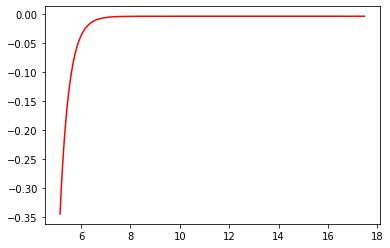

0.3669474943116727

In [20]:
ehn.find_tau0(make_plot=True)

In [ ]:
evaluator.plot_inact([69.69213916785645, 0.8322561384849374, 0.053318071529531635, 4.7405530287730535, 1156.933892882868, 0.8699324501197686, 41.409279270907604, 5.995497534908334, 441.8443377750559, 0.31111050755712066, 25.87604508307024, 0.1425245677420343, 66.13687528939371, 10.019795971029497, 2.1760991677578785, 0.02351699603160466, 707.5482094497809, 1.2037138605843256, 16.740391631625133, 19.134382730889705])

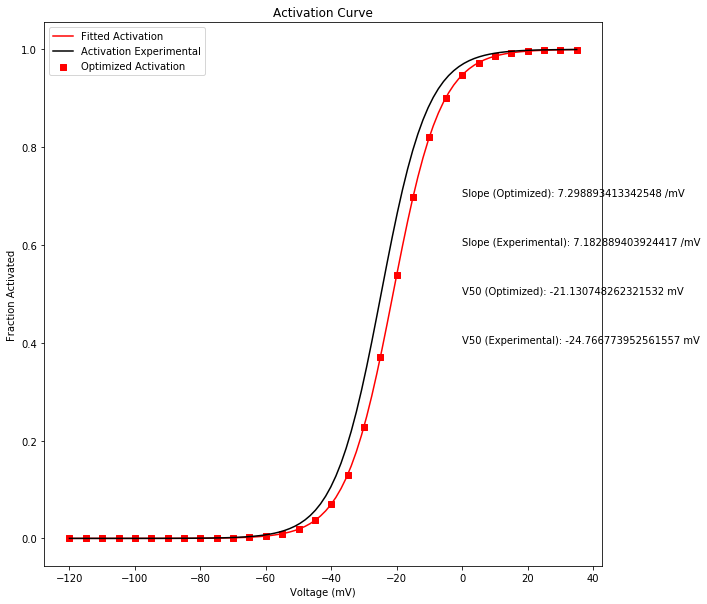

In [6]:
evaluator.plot_act([69.69213916785645, 0.8322561384849374, 0.053318071529531635, 4.7405530287730535, 1156.933892882868, 0.8699324501197686, 41.409279270907604, 5.995497534908334, 441.8443377750559, 0.31111050755712066, 25.87604508307024, 0.1425245677420343, 66.13687528939371, 10.019795971029497, 2.1760991677578785, 0.02351699603160466, 707.5482094497809, 1.2037138605843256, 16.740391631625133, 19.134382730889705])

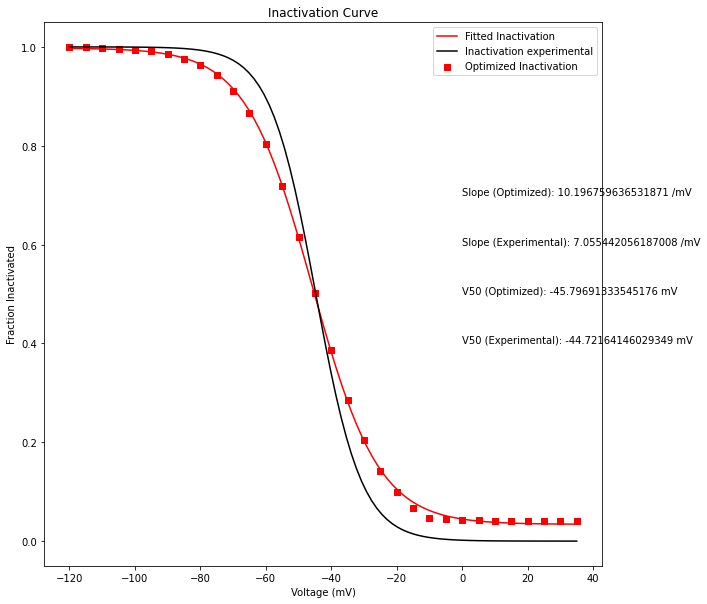

In [7]:
evaluator.plot_inact(best_indvs[-1])

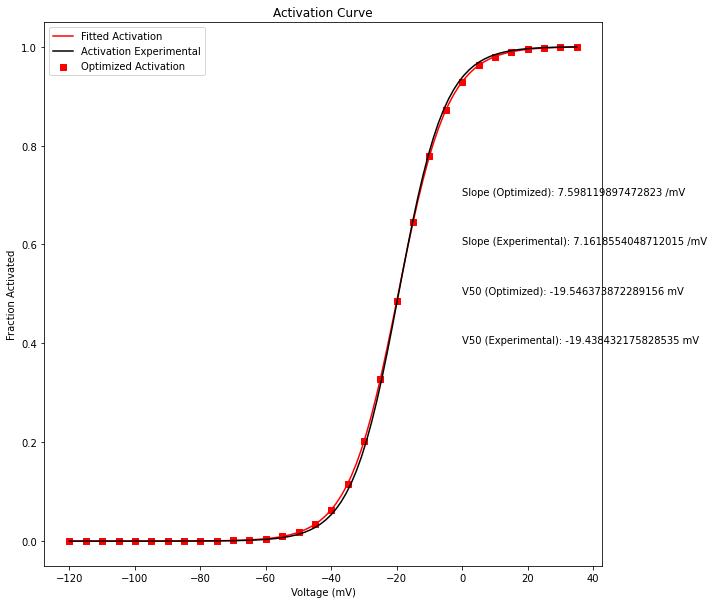

In [8]:
evaluator.plot_act(best_indvs[-1])

In [9]:
best_indvs[-1]

[133.56432360641074,
 1.5894275274132286,
 0.10554725479569353,
 3.825770890166356,
 359.47640695867545,
 0.1622045470206272,
 47.44280194764169,
 5.390939557571051,
 359.13135056345,
 0.48424353721794544,
 7.242910398797656,
 0.20746943104717464,
 65.44239375857778,
 20.81678757847409,
 0.28395163500011433,
 0.6978188406614754,
 2439.501194300378,
 1.4041702933018383,
 17.836976317760467,
 19.30029134403073]

In [ ]:
import eval_helper_na12mut as ehn
import eval_helper_na12mut8st as ehn8

In [ ]:
ehn.find_time_to_peak()

In [ ]:
ehn8.find_time_to_peak()

In [2]:
na12mut_params = [8, -30, 7.2, 0.4, 0.124, -45, -45, 0.5, 1.5, 0.02, 0.01, 2, 0.01, .03, -45, 7, -60, 0.0003, 12, 0.2, 10, -58, 2, 55]

In [3]:
opt_HMM_params = [7.469160595102233, 0.1110309461516207, 0.09834011757279898, 1.959729160651832, 1491.0890579477725, 0.9777458769346035, 45.97790651811909, 4.882721940602804, 242.65899105292436, 2.5542201851262116, 3.09332385731855, 0.3596166292564826, 175.64752705910956, 13.719069975558211, 1.4023566772303253, 0.14909624523920945, 2158.0900150490675, 0.4841273939654566, 21.95876324483144, 16.98204089057011]

ValueError: argument not a density mechanism name.

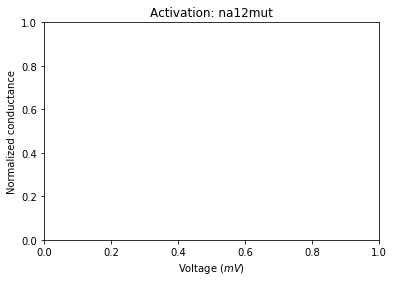

In [4]:
general_plotter.plot_act(na12mut_params, 'na12mut', False, opt_HMM_params, 'na12mut8st', True, './test.pdf', 'na12mut')